# Lab : Image Classification using Convolutional Neural Networks

At the end of this laboratory, you would get familiarized with

*   Creating deep networks using Keras
*   Steps necessary in training a neural network
*   Prediction and performance analysis using neural networks

---

# **In case you use a colaboratory environment**
By default, Colab notebooks run on CPU.
You can switch your notebook to run with GPU.

In order to obtain access to the GPU, you need to choose the tab Runtime and then select “Change runtime type” as shown in the following figure:

![Changing runtime](https://miro.medium.com/max/747/1*euE7nGZ0uJQcgvkpgvkoQg.png)

When a pop-up window appears select GPU. Ensure “Hardware accelerator” is set to GPU.

# **Working with a new dataset: CIFAR-10**

The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images. More information about CIFAR-10 can be found [here](https://www.cs.toronto.edu/~kriz/cifar.html).

In Keras, the CIFAR-10 dataset is also preloaded in the form of four Numpy arrays. x_train and y_train contain the training set, while x_test and y_test contain the test data. The images are encoded as Numpy arrays and their corresponding labels ranging from 0 to 9.

Your task is to:

*   Visualize the images in CIFAR-10 dataset. Create a 10 x 10 plot showing 10 random samples from each class.
*   Convert the labels to one-hot encoded form.
*   Normalize the images.




In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 11s 0us/step


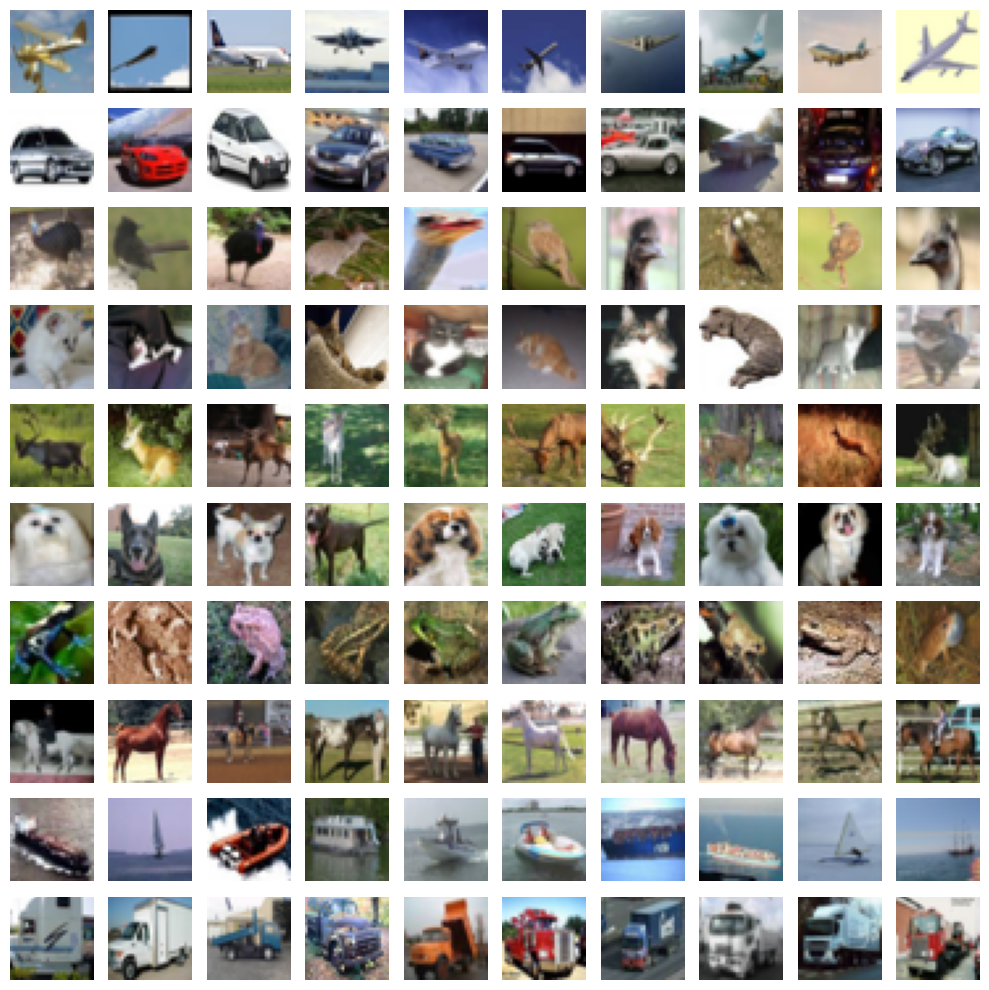

In [2]:
# Your code here :
class_names = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']
plt.figure(figsize=(10,10))
for i in range(10):
    idxs = np.where(y_train == i)[0]
    random_idxs = np.random.choice(idxs, 10, replace=False)
    for j in range(10):
        plt.subplot(10,10, i*10 + j + 1)
        plt.imshow(x_train[random_idxs[j]])
        plt.axis('off')
        if j == 0:
            plt.ylabel(class_names[i], fontsize=8)
plt.tight_layout()
plt.show()

In [4]:
y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)

x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

## Define the following model (same as the one in tutorial)

For the convolutional front-end, start with a single convolutional layer with a small filter size (3,3) and a modest number of filters (32) followed by a max pooling layer.

Use the input as (32,32,3).

The filter maps can then be flattened to provide features to the classifier.

Use a dense layer with 100 units before the classification layer (which is also a dense layer with softmax activation).

In [3]:
from keras.backend import clear_session
clear_session()

In [5]:
# Your code here :
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model_simple = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(100, activation='relu'),
    Dense(10, activation='softmax')
])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


*   Compile the model using categorical_crossentropy loss, SGD optimizer and use 'accuracy' as the metric.
*   Use the above defined model to train CIFAR-10 and train the model for 50 epochs with a batch size of 512.

In [6]:
# Your code here :
model_simple.compile(optimizer='sgd',
                     loss='categorical_crossentropy',
                     metrics=['accuracy'])

history_simple = model_simple.fit(x_train, y_train_cat,
                                  validation_data=(x_test, y_test_cat),
                                  epochs=50,
                                  batch_size=512)


Epoch 1/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 34s 338ms/step - accuracy: 0.1545 - loss: 2.2629 - val_accuracy: 0.2642 - val_loss: 2.1556
Epoch 2/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 43s 359ms/step - accuracy: 0.2793 - loss: 2.1202 - val_accuracy: 0.2930 - val_loss: 2.0276
Epoch 3/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 42s 367ms/step - accuracy: 0.3148 - loss: 1.9960 - val_accuracy: 0.3298 - val_loss: 1.9414
Epoch 4/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 55s 507ms/step - accuracy: 0.3278 - loss: 1.9351 - val_accuracy: 0.3378 - val_loss: 1.8914
Epoch 5/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 35s 360ms/step - accuracy: 0.3444 - loss: 1.8848 - val_accuracy: 0.3520 - val_loss: 1.8515
Epoch 6/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 43s 380ms/step - accuracy: 0.3592 - loss: 1.8389 - val_accuracy: 0.3478 - val_loss: 1.8384
Epoch 7/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 37s 343ms/step - accuracy: 0.3730 - loss: 1.8100 - val_accuracy: 0.3266 - val_loss: 1.8587
Epoch 8/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 40s 328ms/step - accuracy: 0.3717 - loss: 1.8014 - val_accu

*   Plot the cross entropy loss curve and the accuracy curve

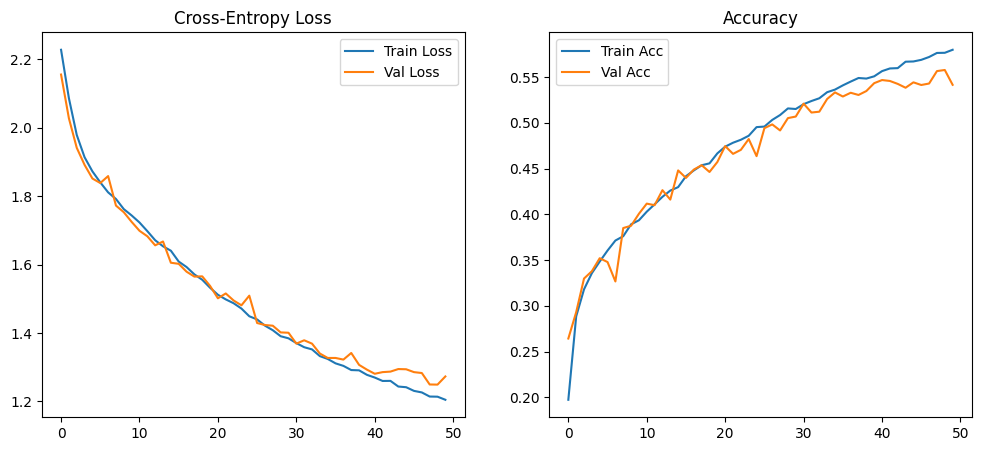

In [8]:
# Your code here :
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(history_simple.history['loss'], label='Train Loss')
plt.plot(history_simple.history['val_loss'], label='Val Loss')
plt.legend()
plt.title('Cross-Entropy Loss')

plt.subplot(1,2,2)
plt.plot(history_simple.history['accuracy'], label='Train Acc')
plt.plot(history_simple.history['val_accuracy'], label='Val Acc')
plt.legend()
plt.title('Accuracy')
plt.show()


## Defining Deeper Architectures: VGG Models

*   Define a deeper model architecture for CIFAR-10 dataset and train the new model for 50 epochs with a batch size of 512. We will use VGG model as the architecture.

Stack two convolutional layers with 32 filters, each of 3 x 3.

Use a max pooling layer and next flatten the output of the previous layer and add a dense layer with 128 units before the classification layer.

For all the layers, use ReLU activation function.

Use same padding for the layers to ensure that the height and width of each layer output matches the input


In [9]:
from keras.backend import clear_session
clear_session()

In [10]:
# Your code here :
model_deep = Sequential([
    Conv2D(32, (3,3), activation='relu', padding='same', input_shape=(32,32,3)),
    Conv2D(32, (3,3), activation='relu', padding='same'),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

*   Compile the model using categorical_crossentropy loss, SGD optimizer and use 'accuracy' as the metric.
*   Use the above defined model to train CIFAR-10 and train the model for 50 epochs with a batch size of 512.

In [11]:
# Your code here :
model_deep.compile(optimizer='sgd',
                   loss='categorical_crossentropy',
                   metrics=['accuracy'])

history_deep = model_deep.fit(x_train, y_train_cat,
                              validation_data=(x_test, y_test_cat),
                              epochs=50,
                              batch_size=512)

Epoch 1/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 134s 1s/step - accuracy: 0.1431 - loss: 2.2835 - val_accuracy: 0.2349 - val_loss: 2.1860
Epoch 2/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 139s 1s/step - accuracy: 0.2385 - loss: 2.1404 - val_accuracy: 0.2826 - val_loss: 2.0177
Epoch 3/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 137s 1s/step - accuracy: 0.2857 - loss: 2.0099 - val_accuracy: 0.3114 - val_loss: 1.9612
Epoch 4/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 146s 1s/step - accuracy: 0.3196 - loss: 1.9415 - val_accuracy: 0.2827 - val_loss: 2.0217
Epoch 5/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 147s 1s/step - accuracy: 0.3425 - loss: 1.8845 - val_accuracy: 0.3517 - val_loss: 1.8534
Epoch 6/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 134s 1s/step - accuracy: 0.3571 - loss: 1.8359 - val_accuracy: 0.3651 - val_loss: 1.7984
Epoch 7/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 142s 1s/step - accuracy: 0.3688 - loss: 1.8086 - val_accuracy: 0.3681 - val_loss: 1.8015
Epoch 8/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 129s 1s/step - accuracy: 0.3831 - loss: 1.7674 - val_accuracy: 0.3764 - v

*   Compare the performance of both the models by plotting the loss and accuracy curves of both the training steps. Does the deeper model perform better? Comment on the observation.


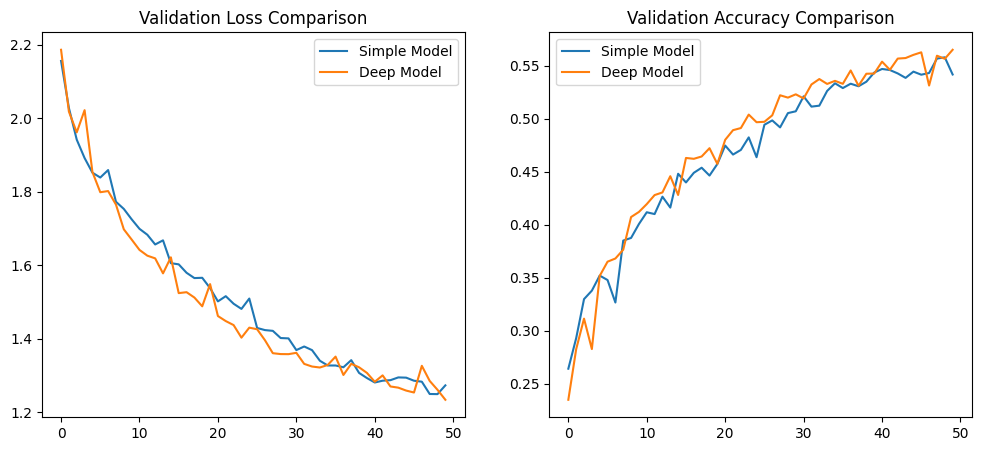

In [12]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(history_simple.history['val_loss'], label='Simple Model')
plt.plot(history_deep.history['val_loss'], label='Deep Model')
plt.legend()
plt.title('Validation Loss Comparison')

plt.subplot(1,2,2)
plt.plot(history_simple.history['val_accuracy'], label='Simple Model')
plt.plot(history_deep.history['val_accuracy'], label='Deep Model')
plt.legend()
plt.title('Validation Accuracy Comparison')
plt.show()
# Your code here :

**Comment on the observation**

*(Double-click or enter to edit)*
The deeper model showed higher accuracy and lower loss on the test data compared to the simple model. The extra depth helped the model learn more complex features and achieve better performance.
...

*   Use predict function to predict the output for the test split
*   Plot the confusion matrix for the new model and comment on the class confusions.


313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 22ms/step


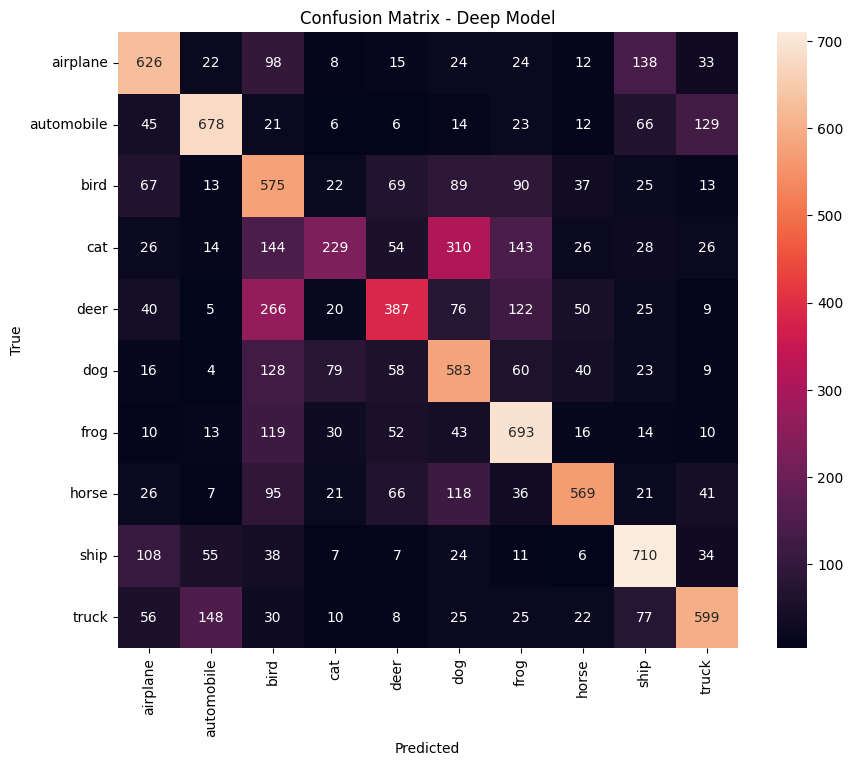

In [13]:
# Your code here :
from sklearn.metrics import confusion_matrix
import seaborn as sns

y_pred = model_deep.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test_cat, axis=1)

cm = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - Deep Model')
plt.show()


**Comment here :**

*(Double-click or enter to edit)*

> Some categories like "cat" and "dog" were confused with each other, which makes sense due to their visual similarity. Overall, the model performs well in distinguishing between most of the categories.

*    Print the test accuracy for the trained model.

In [14]:
# Your code here :
test_loss, test_accuracy = model_deep.evaluate(x_test, y_test_cat)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")


313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 20ms/step - accuracy: 0.5695 - loss: 1.2272
Test Accuracy: 56.49%


## Define the complete VGG architecture.

Stack two convolutional layers with 64 filters, each of 3 x 3 followed by max pooling layer.

Stack two more convolutional layers with 128 filters, each of 3 x 3, followed by max pooling, followed by two more convolutional layers with 256 filters, each of 3 x 3, followed by max pooling.

Flatten the output of the previous layer and add a dense layer with 128 units before the classification layer.

For all the layers, use ReLU activation function.

Use same padding for the layers to ensure that the height and width of each layer output matches the input

*   Change the size of input to 64 x 64.

In [15]:
from keras.backend import clear_session
clear_session()

In [21]:
# Your code here :
from tensorflow.keras.layers import UpSampling2D
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Upsample to 64x64
x_train_64 = tf.image.resize(x_train, [64, 64])
x_test_64 = tf.image.resize(x_test, [64, 64])

model_vgg = Sequential([
    Conv2D(64, (3,3), activation='relu', padding='same', input_shape=(64,64,3)),
    Conv2D(64, (3,3), activation='relu', padding='same'),
    MaxPooling2D(pool_size=(2,2)),

    Conv2D(128, (3,3), activation='relu', padding='same'),
    Conv2D(128, (3,3), activation='relu', padding='same'),
    MaxPooling2D(pool_size=(2,2)),

    Conv2D(256, (3,3), activation='relu', padding='same'),
    Conv2D(256, (3,3), activation='relu', padding='same'),
    MaxPooling2D(pool_size=(2,2)),

    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


*   Compile the model using categorical_crossentropy loss, SGD optimizer and use 'accuracy' as the metric.
*   Use the above defined model to train CIFAR-10 and train the model for 10 epochs with a batch size of 512.
*   Predict the output for the test split and plot the confusion matrix for the new model and comment on the class confusions.

In [22]:
# Your code here :
from tensorflow.keras.layers import UpSampling2D
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Upsample to 64x64
x_train_64 = tf.image.resize(x_train, [64, 64])
x_test_64 = tf.image.resize(x_test, [64, 64])

model_vgg = Sequential([
    Conv2D(64, (3,3), activation='relu', padding='same', input_shape=(64,64,3)),
    Conv2D(64, (3,3), activation='relu', padding='same'),
    MaxPooling2D(pool_size=(2,2)),

    Conv2D(128, (3,3), activation='relu', padding='same'),
    Conv2D(128, (3,3), activation='relu', padding='same'),
    MaxPooling2D(pool_size=(2,2)),

    Conv2D(256, (3,3), activation='relu', padding='same'),
    Conv2D(256, (3,3), activation='relu', padding='same'),
    MaxPooling2D(pool_size=(2,2)),

    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])



/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


# Understanding deep networks

*   What is the use of activation functions in network? Why is it needed?
*   We have used softmax activation function in the exercise. There are other activation functions available too. What is the difference between sigmoid activation and softmax activation?
*   What is the difference between categorical crossentropy and binary crossentropy loss?

**Write the answers below :**

1 - Use of activation functions:

Activation functions add non-linearity to the neural network, which helps the model learn complex patterns in the data. Without activation functions, the network would only be able to learn simple relationships.



_

2 - Key Differences between sigmoid and softmax:

Sigmoid is used for binary classification and gives a single value between 0 and 1. Softmax is used for multi-class classification and gives a probability distribution over all classes, where the sum of all outputs is 1.

_

3 - Key Differences between categorical crossentropy and binary crossentropy loss:
Categorical crossentropy is used when there are more than two classes, and the labels are one-hot encoded. Binary crossentropy is used for binary classification, where labels are either 0 or 1.

_
